In [89]:
%load_ext autoreload
%autoreload 2

import os
import sys
DISCO_ROOT_FOLDER ='/Users/lena/Documents/Projects/PycharmProjects/DISCO'
#%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
from src.Evaluation.disco import disco_samples, p_noise
from src.utils.metrics import METRICS
import numpy as np
import matplotlib.pyplot as plt

METRICS["DISCO_non_noise"] = lambda X, l: np.mean(disco_samples(X, l)[l!=-1])
METRICS["DISCO_noise"] = lambda X, l: np.mean(disco_samples(X, l)[l==-1])
METRICS["DISCO_core_prop"] = lambda X, l: np.mean(p_noise(X, l)[0])
METRICS["DISCO_dc_prop"] = lambda X, l: np.mean(p_noise(X, l)[1])

for name in METRICS.keys():
    METRICS[name].__name__ = name

METRICS.keys()

dict_keys(['DISCO', 'DBCV', 'DCSI', 'LCCV', 'VIASCKDE', 'CVDD', 'CDBW', 'CVNN', 'SILHOUETTE', 'S_DBW', 'DISCO_non_noise', 'DISCO_noise', 'DISCO_core_prop', 'DISCO_dc_prop'])

In [91]:
from mpire.pool import WorkerPool
import warnings
warnings.filterwarnings("ignore")

def print_scores(X, l):

    def get_score(eval_metric):
        try:
            return f"{eval_metric.__name__}: {round(eval_metric(X, l), 2)}"
        except:
            pass

    # pool = WorkerPool(1)
    # results = pool.imap(get_score, METRICS.values())
    results = [get_score(m) for m in METRICS.values()]
    for result in results:
        print(result)

In [92]:
import matplotlib.colors as mcolors
from src.utils.colors import colors

def plot_data(X, l, save_fig=None, save_format="png", show=True, cluster_marker_size=5, cluster_marker_density=1, noise_marker_size=80):
    fig = plt.figure()
    #cmap = mcolors.ListedColormap([colors["purple"], colors["red"], colors["green"], colors["orange"]])
    cmap = mcolors.ListedColormap(['dimgray','mediumvioletred', 'orange','navy', 'gold'])#colors["blue"]
    plt.scatter(
        X[:, 0][l != -1][::cluster_marker_density],
        X[:, 1][l != -1][::cluster_marker_density],
        s=cluster_marker_size,
        c=l[l != -1][::cluster_marker_density],
        vmin=-1,
        vmax=3,
        cmap=cmap,
    )
    plt.scatter(X[:, 0][l==-1], X[:, 1][l==-1], s=noise_marker_size, c=l[l==-1], vmin=-1, vmax=3, cmap=cmap, marker="+", alpha=0.8)
    plt.xticks([])
    plt.yticks([])
    #if save_fig:
    plt.savefig(f"{save_fig}v2.{save_format}", format=save_format, dpi=300, bbox_inches="tight", pad_inches=0)
    if show:
        plt.show()
    return fig

In [25]:
# from datasets.density_datasets import Datasets as DensityDatasets

# X, l = DensityDatasets.dartboard1.standardized_data_cached

n_points per cluster: [50, 150, 250]
(450, 2) (450,)


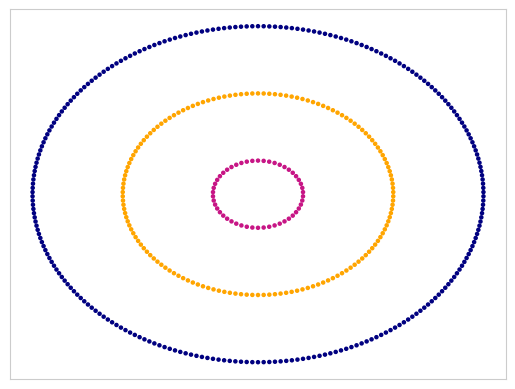

DISCO: 0.87
DBCV: 0.96
DCSI: 1.0
LCCV: 0.61
VIASCKDE: nan
CVDD: 2510.91
CDBW: 0.0
CVNN: 59.56
SILHOUETTE: -0.12
S_DBW: 0.97
DISCO_non_noise: 0.87
DISCO_noise: nan
DISCO_core_prop: nan
DISCO_dc_prop: nan


In [93]:
import math

# radii = [5,10,15,20]
# n_points_per_cluster = [100,200,300,400]
radii = [5, 15, 25]
n_points_per_cluster = [100, 300, 500]
n_points_per_cluster = [50, 150, 250]

X = np.array(
    [
        [math.sin((2 * math.pi / n_points) * i) * radius, math.cos((2 * math.pi / n_points) * i) * radius]
        for radius, n_points in zip(radii, n_points_per_cluster)
        for i in range(n_points)
    ]
)
l = np.array(sum([[c] * n_points for c, n_points in enumerate(n_points_per_cluster)], []))

print("n_points per cluster:", [len(l[l == i]) for i in set(l)])
print(X.shape, l.shape)

plot_data(X, l, save_fig="motivation_dartboard")
print_scores(X, l)

(450, 2) (450,)


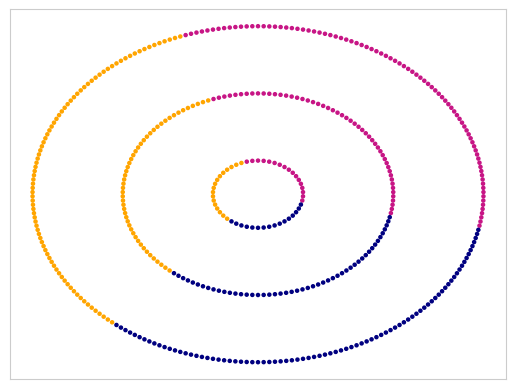

DISCO: -0.01
DBCV: -0.94
DCSI: 0.0
LCCV: 0.12
VIASCKDE: nan
CVDD: 0.28
CDBW: 0.0
CVNN: 50.61
SILHOUETTE: 0.37
S_DBW: 0.63
DISCO_non_noise: -0.01
DISCO_noise: nan
DISCO_core_prop: nan
DISCO_dc_prop: nan


In [94]:
from sklearn.cluster import KMeans
np.random.seed(0)
l_kmeans = KMeans(3).fit_predict(X)

print(X.shape, l_kmeans.shape)

plot_data(X, l_kmeans, save_fig="motivation_dartboard_kmeans")
print_scores(X, l_kmeans)

In [28]:
np.random.seed(0)
X_noise, l_noise = add_noise(X, l, 300, 1.6, 0.6)

np.random.seed(0)
X_noise_, l_noise_ = add_noise(X, l, 300, 1.6, 0.6)

(550, 2) (550,)


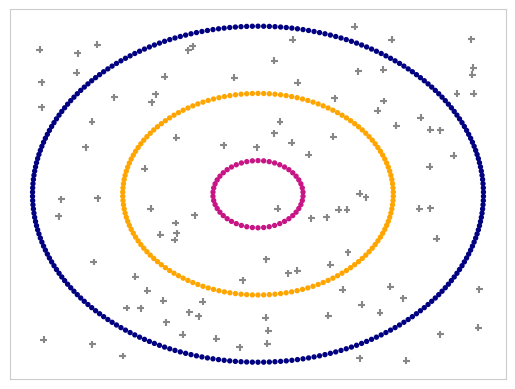

DISCO: 0.6
DBCV: 0.79
DCSI: 1.0
LCCV: 0.6
VIASCKDE: 0.01
CVDD: 187.06
CDBW: 0.0
CVNN: 59.4
SILHOUETTE: -0.15
S_DBW: 0.97
DISCO_non_noise: 0.6
DISCO_noise: 0.6
DISCO_core_prop: 0.6
DISCO_dc_prop: 0.6


In [95]:
from src.utils.data import add_noise

np.random.seed(0)
X_noise, l_noise = add_noise(X, l, 100, 1.6, 0.6)
# X_noise, l2 = add_noise(X, l1, 70, 0.15, 0.07)

print(X_noise.shape, l_noise.shape)

plot_data(X_noise, l_noise, save_fig="Motiva", cluster_marker_size=8, noise_marker_size=25)
print_scores(X_noise, l_noise)

In [96]:
from src.utils.metrics import DBCV

np.random.seed(42)


def shuffle(X, l):
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    return X[idx], l[idx]


dbcv_values = np.array([DBCV(*shuffle(X_noise, l_noise)) for _ in range(15)])
dbcv_values.mean(), dbcv_values.std()

(np.float64(0.7883022732190417), np.float64(2.220446049250313e-16))

(550, 2) (550,)


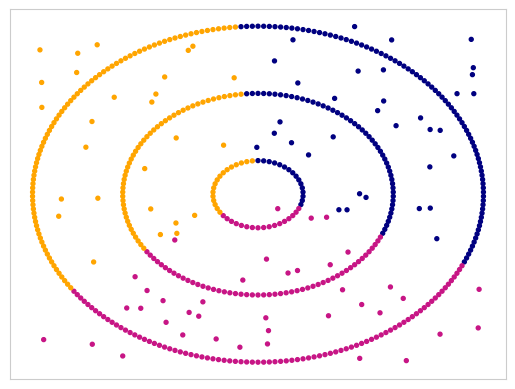

DISCO: -0.01
DBCV: -0.84
DCSI: 0.01
LCCV: 0.11
VIASCKDE: 0.01
CVDD: 0.42
CDBW: 0.0
CVNN: 50.54
SILHOUETTE: 0.38
S_DBW: 0.81
DISCO_non_noise: -0.01
DISCO_noise: nan
DISCO_core_prop: nan
DISCO_dc_prop: nan


In [97]:
from src.utils.data import add_noise
from sklearn.cluster import KMeans

np.random.seed(0)
# X_noise, l_noise = add_noise(X, l, 300, 1.6, 0.6)
# X_noise, l2 = add_noise(X, l1, 70, 0.15, 0.07)
l_kmeans = KMeans(3).fit_predict(X_noise)

print(X_noise.shape, l_kmeans.shape)

plot_data(X_noise, l_kmeans, save_fig="Motivb", cluster_marker_size=8)
print_scores(X_noise, l_kmeans)

In [32]:
from src.utils.metrics import DBCV

np.random.seed(42)


def shuffle(X, l):
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    return X[idx], l[idx]


dbcv_values = np.array([DBCV(*shuffle(X_noise, l_kmeans)) for _ in range(15)])
dbcv_values.mean(), dbcv_values.std()

(np.float64(-0.8748436137072159), np.float64(0.01961063501839182))

(550, 2) (550,)


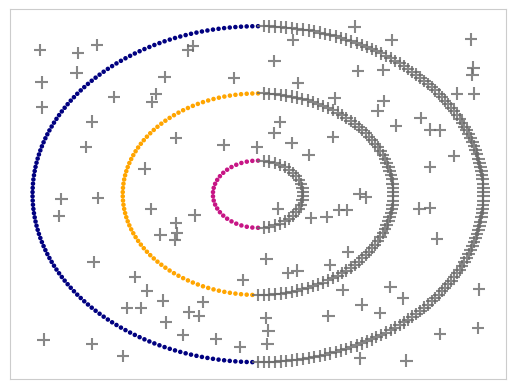

DISCO: 0.35
DBCV: 0.4
DCSI: 1.0
LCCV: 0.31
VIASCKDE: 0.01
CVDD: 0.09
CDBW: 0.0
CVNN: 44.02
SILHOUETTE: -0.05
S_DBW: 0.7
DISCO_non_noise: 0.6
DISCO_noise: 0.18
DISCO_core_prop: 0.18
DISCO_dc_prop: 0.19


In [33]:
l_right_noise = l_noise.copy()
idx = np.where(X[:, 0] > 0)[0]
l_right_noise[idx] = -1

print(X_noise.shape, l_right_noise.shape)

plot_data(X_noise, l_right_noise, save_fig="dartboard_noise_split")
print_scores(X_noise, l_right_noise)

In [34]:
import math
from functools import reduce
np.random.seed(200)

r = np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2)
radii = np.unique(np.round(r))

n_noise_list = reduce(lambda list, elem: list + [list[-1] + list[0]], range(3), [25])
n_noise = sum(n_noise_list, 0)
l_circle_noise = sum([[i] * n_noise for i, n_noise in enumerate(n_noise_list)], [])

angles = np.random.choice(360, size=n_noise, replace=True).astype(float)
angles *= (2 * math.pi / 360)

X_circle_noise = np.array(
    [[math.sin(angle) * radii[id], math.cos(angle) * radii[id]] for id, angle in zip(l_circle_noise, angles)]
)

X_n_circ = X.copy()
X_n_circ = np.vstack((X_n_circ, X_circle_noise))

l_n_circ = l.copy()
l_n_circ = np.hstack((l_n_circ, np.array([-1] * n_noise)))

from src.utils.data import add_noise
np.random.seed(0)
X_n_circ, l_n_circ = add_noise(X_n_circ, l_n_circ, 50, 1.6, 0.6)

print(X_n_circ.shape, l_n_circ.shape)

plot_data(X_n_circ, l_n_circ, save_fig="dartboard_noise_on_circle")
print_scores(X_n_circ, l_n_circ)

IndexError: index 3 is out of bounds for axis 0 with size 3

In [35]:
from sklearn.neighbors import NearestNeighbors

data = X_n_circ[-50:]

nbrs = NearestNeighbors(n_neighbors=1).fit(X)
_, idx = nbrs.kneighbors(data)
l_n_cirl_nn = l_n_circ.copy()
l_n_cirl_nn[-50:] = l[idx].flatten()

print(X_n_circ.shape, l_n_cirl_nn.shape)

plot_data(X_n_circ, l_n_cirl_nn, save_fig="dartboard_noise_on_circle_nn")
print_scores(X_n_circ, l_n_cirl_nn)

NameError: name 'X_n_circ' is not defined

(550, 2) (550,)


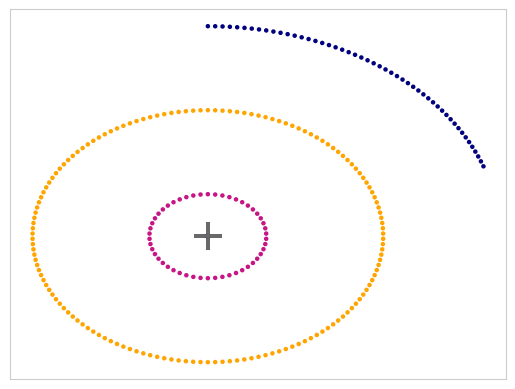

DISCO: 0.36
DBCV: 0.78
DCSI: 0.39
LCCV: 0.15
None
CVDD: 0.0
CDBW: 0.01
CVNN: 36.05
SILHOUETTE: -0.25
S_DBW: 1.11
DISCO_non_noise: 0.66
DISCO_noise: -1.0
DISCO_core_prop: -1.0
DISCO_dc_prop: -1.0


In [36]:
X_noise_c = X_noise.copy()
X_noise_c[-300:] = [0, 0]

print(X_noise_c.shape, l_noise.shape)

plot_data(X_noise_c, l_noise, save_fig="dartboard_noise_center", noise_marker_size=400)
print_scores(X_noise_c, l_noise)

(550, 2) (550,)


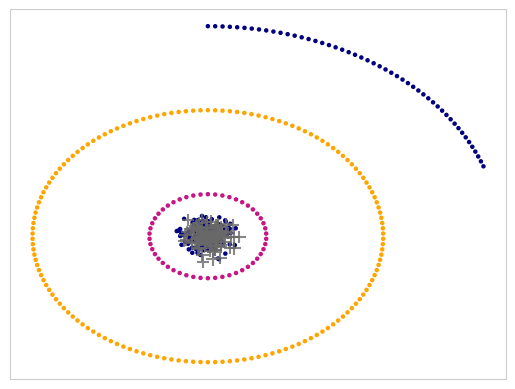

DISCO: 0.09
DBCV: -0.13
DCSI: 0.98
LCCV: 0.03
VIASCKDE: -0.0
CVDD: 0.38
CDBW: 0.0
CVNN: 37.2
SILHOUETTE: -0.22
S_DBW: 1.2
DISCO_non_noise: 0.31
DISCO_noise: -0.88
DISCO_core_prop: -0.88
DISCO_dc_prop: -0.88


In [37]:
from sklearn.datasets import make_blobs

noise_blob = make_blobs(centers=[[0, 0]], n_samples=300, random_state=0)
noise_blob[0]
X_noise_c = X_noise.copy()
X_noise_c[-300:] = noise_blob[0]

print(X_noise_c.shape, l_noise.shape)

plot_data(X_noise_c, l_noise, save_fig="dartboard_noise_center_blob")
print_scores(X_noise_c, l_noise)

(550, 2) (550,)


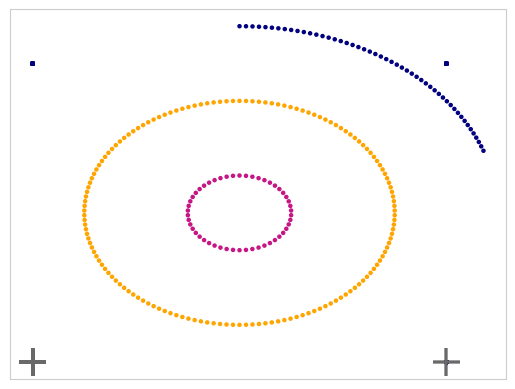

DISCO: 0.25
DBCV: 0.78
DCSI: 0.48
LCCV: 0.0
None
CVDD: 0.0
CDBW: 0.0
CVNN: 55.36
SILHOUETTE: 0.09
S_DBW: 0.93
DISCO_non_noise: 0.53
DISCO_noise: -1.0
DISCO_core_prop: -1.0
DISCO_dc_prop: 0.36


In [38]:
X_noise_at_corner = X_noise.copy()
X_noise_at_corner[-75 * 4 : -75 * 3] = [20, 20]
X_noise_at_corner[-75 * 3 : -75 * 2] = [-20, 20]
X_noise_at_corner[-75 * 2 : -75 * 1] = [20, -20]
X_noise_at_corner[-75 * 1 :] = [-20, -20]

print(X_noise_at_corner.shape, l_noise.shape)

plot_data(X_noise_at_corner, l_noise, save_fig="dartboard_noise_corner", noise_marker_size=400)
print_scores(X_noise_at_corner, l_noise)

(550, 2) (550,)


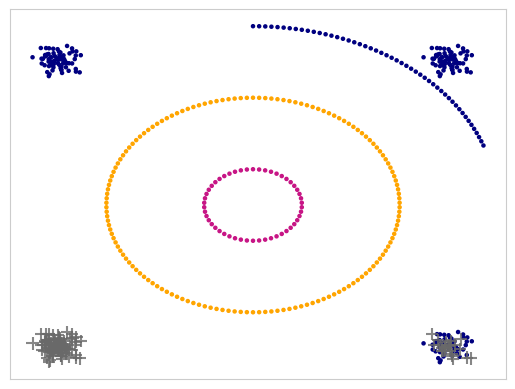

DISCO: 0.32
DBCV: -0.04
DCSI: 0.45
LCCV: 0.29
VIASCKDE: 0.07
CVDD: 0.67
CDBW: 0.0
CVNN: 55.74
SILHOUETTE: 0.08
S_DBW: 0.93
DISCO_non_noise: 0.57
DISCO_noise: -0.78
DISCO_core_prop: -0.78
DISCO_dc_prop: 0.38


In [39]:
from sklearn.datasets import make_blobs

noise_blob = make_blobs(centers=[[20, 20]], n_samples=75, random_state=0)[0]
noise_blob[0]

X_noise_at_corner = X_noise.copy()
X_noise_at_corner[-75 * 4 : -75 * 3] = make_blobs(centers=[[20, 20]], n_samples=75, random_state=0)[0]
X_noise_at_corner[-75 * 3 : -75 * 2] = make_blobs(centers=[[-20, 20]], n_samples=75, random_state=0)[0]
X_noise_at_corner[-75 * 2 : -75 * 1] = make_blobs(centers=[[20, -20]], n_samples=75, random_state=0)[0]
X_noise_at_corner[-75 * 1 :] = make_blobs(centers=[[-20, -20]], n_samples=75, random_state=0)[0]

print(X_noise_at_corner.shape, l_noise.shape)

plot_data(X_noise_at_corner, l_noise, save_fig="dartboard_noise_corner_blob")
print_scores(X_noise_at_corner, l_noise)

(550, 2) (550,)


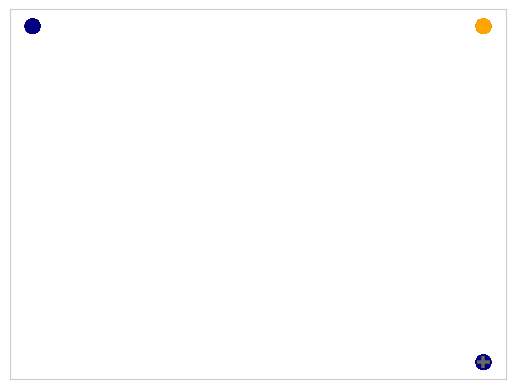

DISCO: 0.16
DBCV: -0.07
DCSI: 0.11
LCCV: 0.0
None
CVDD: nan
CDBW: 0.0
CVNN: 22.58
SILHOUETTE: -0.09
S_DBW: 0.57
DISCO_non_noise: 0.2
DISCO_noise: 0.0
DISCO_core_prop: 0.0
DISCO_dc_prop: 0.0


In [40]:
X_at_corner = X_noise.copy()
X_at_corner[:100] = [10, 10]
X_at_corner[100:300] = [-10, 10]
X_at_corner[300:600] = [10, -10]
X_at_corner[600:1000] = [-10, -10]
# X_at_corner[:] = [0,0]

print(X_at_corner.shape, l_noise.shape)

plot_data(X_at_corner, l_noise, save_fig="dartboard_quadrat", cluster_marker_size=100)
print_scores(X_at_corner, l_noise)

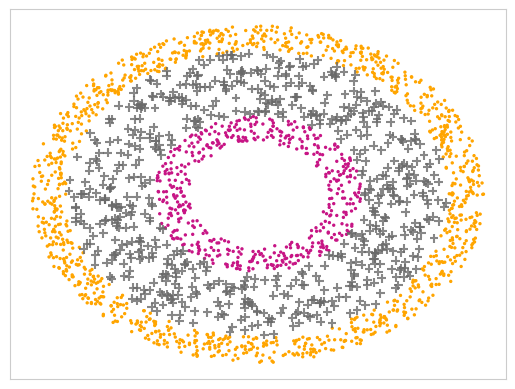

DISCO: 0.88
DBCV: 0.86
DCSI: 0.98
LCCV: 0.61
VIASCKDE: 0.09
CVDD: 751.64
CDBW: 0.0
CVNN: 22.39
SILHOUETTE: 0.01
S_DBW: 0.98
DISCO_non_noise: 0.88
DISCO_noise: nan
DISCO_core_prop: nan
DISCO_dc_prop: nan

DISCO: 0.03
DBCV: 0.61
DCSI: 0.98
LCCV: -0.03
VIASCKDE: 0.07
CVDD: 42.32
CDBW: 0.0
CVNN: 22.36
SILHOUETTE: -0.07
S_DBW: 0.98
DISCO_non_noise: 0.15
DISCO_noise: -0.26
DISCO_core_prop: -0.26
DISCO_dc_prop: -0.16


In [41]:
np.random.seed(42^7)

def add_donut(n_points, inner_radius, outer_radius):
    data = np.empty((n_points, 2))
    data_too_near = np.array(range(len(data)))
    while len(data_too_near) > 0:
        data[data_too_near] = np.random.uniform(-outer_radius, outer_radius, size=(len(data_too_near), X.shape[1]))
        dists_points = np.sqrt(data[:,0]**2 + data[:, 1]**2)
        data_too_near = np.where((dists_points > outer_radius) | (dists_points < inner_radius))[0]
    return data

X_donut_0 = add_donut(500, 4, 6)
X_donut_noise = add_donut(700, 6.1, 10.9)
X_donut_1 = add_donut(1200, 11, 13)

X_donut = np.vstack((X_donut_0, X_donut_noise, X_donut_1))
l_donut = np.array([0] * len(X_donut_0) + [-1] * len(X_donut_noise) + [1] * len(X_donut_1))

# dists_points = np.sqrt(data[:,0]**2 + data[:, 1]**2)
# 0: 4 - 7, noise: 7-10, 1: 10-13
# l_donut[np.where((dists_points < 7))[0]] = 0
# l_donut[np.where((dists_points > 10))[0]] = 1

fig = plot_data(X_donut, l_donut, save_fig="motivation_donut_noise", cluster_marker_size=2, noise_marker_size=40)
print_scores(X_donut[l_donut != -1], l_donut[l_donut != -1])
print()
print_scores(X_donut, l_donut)

In [43]:
from src.utils.metrics import DBCV

np.random.seed(42)

def shuffle(X, l):
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    return X[idx], l[idx]

dbcv_values = np.array([DBCV(*shuffle(X_donut, l_donut)) for _ in range(15)])
dbcv_values.mean(), dbcv_values.std()

(np.float64(0.6400875743664038), np.float64(0.010589207788766533))

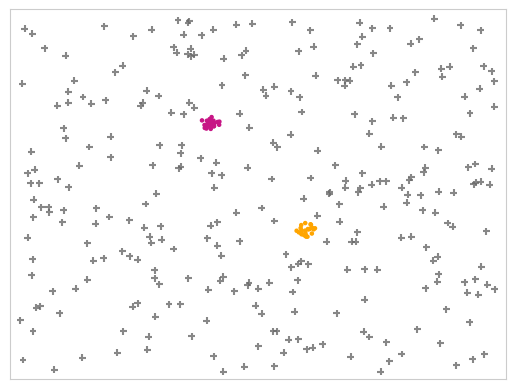

DISCO: 0.98
DBCV: 1.0
DCSI: 1.0
LCCV: 0.55
VIASCKDE: 0.09
CVDD: 792.01
CDBW: 0.94
CVNN: 4.53
SILHOUETTE: 0.95
S_DBW: 0.08
DISCO_non_noise: 0.98
DISCO_noise: nan
DISCO_core_prop: nan
DISCO_dc_prop: nan

DISCO: 0.81
DBCV: 0.25
DCSI: 1.0
LCCV: 0.26
VIASCKDE: nan
CVDD: 16.48
CDBW: 0.94
CVNN: 4.53
SILHOUETTE: -0.08
S_DBW: 0.08
DISCO_non_noise: 0.9
DISCO_noise: 0.79
DISCO_core_prop: 0.79
DISCO_dc_prop: 0.83


In [44]:
# Good Noise

import numpy as np
from sklearn.neighbors import NearestNeighbors

def add_noise_(X, l, n_noise, eps, noise_eps, border=0):
    """Add noise to data with at least eps distance to the data."""

    noise = np.empty((n_noise, X.shape[1]))
    noise_too_near = np.array(range(len(noise)))
    while len(noise_too_near) > 0:
        noise[noise_too_near] = np.random.uniform(-50, 50, size=(len(noise_too_near), X.shape[1]))
        nbrs_points = NearestNeighbors(n_neighbors=1).fit(X)
        dists_points = nbrs_points.kneighbors(noise)[0]
        noise_too_near_points = np.where(dists_points < eps)[0]
        nbrs_noise = NearestNeighbors(n_neighbors=2).fit(noise)
        dists_noise = nbrs_noise.kneighbors(noise)[0][:, 1]
        noise_too_near_noise = np.where(dists_noise < noise_eps)[0]
        noise_too_near = np.unique(np.hstack((noise_too_near_points, noise_too_near_noise)))

    X_ = np.vstack((X, noise))
    l_ = np.hstack((l, np.array([-1] * len(noise))))

    return X_, l_


def make_blob_and_noise_dist_uniform(n_samples, n_noise=0, seed=0):
    np.random.seed(seed)
    n_samples = n_samples
    centers = np.array([[-10, 20], [10, -10]])
    X = np.empty((0, 2))
    l = np.empty((0))
    for i, center in enumerate(centers):
        X_i = np.empty((0, 2))
        while len(X_i) < n_samples:
            X_i_ = np.random.uniform(low=center - 2, high=center + 2, size=(n_samples * 10, 2))
            X_i_mask = np.linalg.norm(X_i_ - center, axis=1) <= 2
            X_i_ = X_i_[X_i_mask]
            X_i = np.vstack((X_i, X_i_[: min(n_samples - len(X_i), len(X_i_))]))
        X = np.vstack((X, X_i))
        l = np.hstack((l, np.array([i] * len(X_i))))
    X, l = add_noise_(X, l, n_noise, 2, 0.5, border=5)
    return X, l


X, l = make_blob_and_noise_dist_uniform(50, n_noise=300)

fig = plot_data(X, l, save_fig="motivation_background_noise", noise_marker_size=25, show=False, cluster_marker_density=2)
ax = fig.gca()
ax.set_xlim(-52, 52)
ax.set_ylim(-52, 52)
plt.savefig(f"{"motivation_background_noisev2"}.{"png"}", format="png", dpi=300, bbox_inches="tight", pad_inches=0)
plt.show()
print_scores(X[l != -1], l[l != -1])
print()
print_scores(X, l)

In [45]:
from src.utils.metrics import DBCV

np.random.seed(42)

def shuffle(X, l):
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    return X[idx], l[idx]


dbcv_values = np.array([DBCV(*shuffle(X, l)) for _ in range(15)])
dbcv_values.mean(), dbcv_values.std()

(np.float64(0.24980638041236203), np.float64(8.44087909835249e-06))

In [46]:
!pip install mpire[dill]

zsh:1: no matches found: mpire[dill]


In [47]:
!ls -lh imgs/motivation/motivation*

zsh:1: no matches found: imgs/motivation/motivation*


In [48]:
# Good Noise
#!pip install mpire
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from src.utils.colors import colors
from mpire.pool import WorkerPool
import warnings

warnings.filterwarnings("ignore")


def print_scores(X, l):
    def get_score(eval_metric):
        try:
            return f"{eval_metric.__name__}: {round(eval_metric(X, l), 2)}"
        except:
            pass

    from src.utils.metrics import METRICS
    results = []
    for metric in METRICS.values():
        results.append(get_score(metric))
    # results = []
    for result in results:
        print(result)


def plot_data(X, l, save_fig=None, save_format="png", show=True, cluster_marker_size=5, cluster_marker_density=1,
              noise_marker_size=80):
    fig = plt.figure()
    #cmap = mcolors.ListedColormap([colors["purple"], colors["red"], colors["green"], colors["orange"]])
    cmap = mcolors.ListedColormap(['dimgray', 'mediumvioletred', 'orange', 'navy', 'gold'])  #colors["blue"]
    plt.scatter(
        X[:, 0][l != -1][::cluster_marker_density],
        X[:, 1][l != -1][::cluster_marker_density],
        s=cluster_marker_size,
        c=l[l != -1][::cluster_marker_density],
        vmin=-1,
        vmax=3,
        cmap=cmap,
    )
    plt.scatter(X[:, 0][l == -1], X[:, 1][l == -1], s=noise_marker_size, c=l[l == -1], vmin=-1, vmax=3, cmap=cmap,
                marker="+", alpha=0.8)
    plt.xticks([])
    plt.yticks([])
    #if save_fig:
    plt.savefig(f"{save_fig}v2.{save_format}", format=save_format, dpi=300, bbox_inches="tight", pad_inches=0)
    if show:
        plt.show()
    return fig


def add_noise_(X, l, n_noise, eps, noise_eps, border=0):
    """Add noise to data with at least eps distance to the data."""

    noise = np.empty((n_noise, X.shape[1]))
    noise_too_near = np.array(range(len(noise)))
    while len(noise_too_near) > 0:
        noise[noise_too_near] = np.random.uniform(-50, 50, size=(len(noise_too_near), X.shape[1]))
        nbrs_points = NearestNeighbors(n_neighbors=1).fit(X)
        dists_points = nbrs_points.kneighbors(noise)[0]
        noise_too_near_points = np.where(dists_points < eps)[0]
        nbrs_noise = NearestNeighbors(n_neighbors=2).fit(noise)
        dists_noise = nbrs_noise.kneighbors(noise)[0][:, 1]
        noise_too_near_noise = np.where(dists_noise < noise_eps)[0]
        noise_too_near = np.unique(np.hstack((noise_too_near_points, noise_too_near_noise)))

    X_ = np.vstack((X, noise))
    l_ = np.hstack((l, np.array([-1] * len(noise))))

    return X_, l_


def make_blob_and_noise_dist_uniform(n_samples, n_noise=0, seed=0):
    np.random.seed(seed)
    n_samples = n_samples
    centers = np.array([[-10, 20], [10, -10]])
    X = np.empty((0, 2))
    l = np.empty((0))
    for i, center in enumerate(centers):
        X_i = np.empty((0, 2))
        while len(X_i) < n_samples:
            X_i_ = np.random.uniform(low=center - 2, high=center + 2, size=(n_samples * 10, 2))
            X_i_mask = np.linalg.norm(X_i_ - center, axis=1) <= 2
            X_i_ = X_i_[X_i_mask]
            X_i = np.vstack((X_i, X_i_[: min(n_samples - len(X_i), len(X_i_))]))
        X = np.vstack((X, X_i))
        l = np.hstack((l, np.array([i] * len(X_i))))
    X, l = add_noise_(X, l, n_noise, 2, 0.5, border=5)
    for i, label in enumerate(l):
        if label == -1.:
            x_ = X[i]
            if x_[1] >= -1.5* x_[0] +25:
                    l[i] = 2.
            elif x_[1] <= -1.5* x_[0] -25:
                    l[i] = 3.

    return X, l


X, l = make_blob_and_noise_dist_uniform(50, n_noise=300)


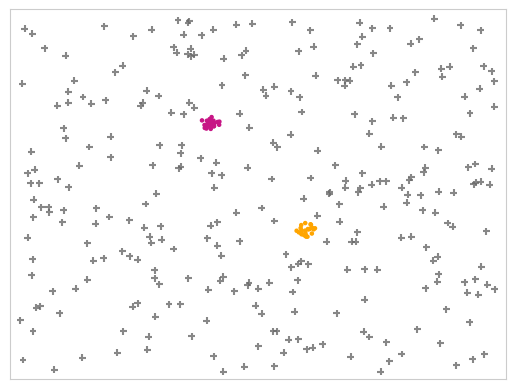

DISCO: 0.98
DBCV: 1.0
DCSI: 1.0
LCCV: 0.55
VIASCKDE: 0.09
CVDD: 792.01
CDBW: 0.94
CVNN: 4.53
SILHOUETTE: 0.95
S_DBW: 0.08
DISCO_non_noise: 0.98
DISCO_noise: nan
DISCO_core_prop: nan
DISCO_dc_prop: nan

DISCO: 0.81
DBCV: 0.25
DCSI: 1.0
LCCV: 0.26
VIASCKDE: nan
CVDD: 16.48
CDBW: 0.94
CVNN: 4.53
SILHOUETTE: -0.08
S_DBW: 0.08
DISCO_non_noise: 0.9
DISCO_noise: 0.79
DISCO_core_prop: 0.79
DISCO_dc_prop: 0.83
DISCO: 0.81
DBCV: 0.25
DCSI: 1.0
LCCV: 0.26
VIASCKDE: nan
CVDD: 16.48
CDBW: 0.94
CVNN: 4.53
SILHOUETTE: -0.08
S_DBW: 0.08
DISCO_non_noise: 0.9
DISCO_noise: 0.79
DISCO_core_prop: 0.79
DISCO_dc_prop: 0.83


In [49]:
l_2= l
l_2[l==2.] = -1.
l_2[l==3.] = -1.
fig = plot_data(X, l, save_fig="motivation_background_noise", noise_marker_size=25, show=False,
                cluster_marker_density=2)
ax = fig.gca()
ax.set_xlim(-52, 52)
ax.set_ylim(-52, 52)
#plt.savefig(f"{"motivation_background_noisev2"}.{"png"}", format="png", dpi=300, bbox_inches="tight", pad_inches=0)
plt.show()
print_scores(X[l != -1], l[l != -1])
print()
print_scores(X, l)
print_scores(X, l_2)

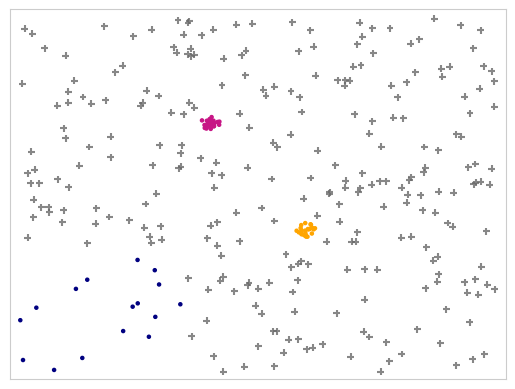

DISCO: 0.9
DBCV: 0.96
DCSI: 0.96
LCCV: 0.78
VIASCKDE: nan
CVDD: 3.18
CDBW: 0.1
CVNN: 32.3
SILHOUETTE: 0.86
S_DBW: 0.22
DISCO_non_noise: 0.9
DISCO_noise: nan
DISCO_core_prop: nan
DISCO_dc_prop: nan

DISCO: -0.14
DBCV: 0.31
DCSI: 0.96
LCCV: 0.29
VIASCKDE: nan
CVDD: 0.05
CDBW: 0.1
CVNN: 30.19
SILHOUETTE: -0.03
S_DBW: 0.22
DISCO_non_noise: 0.66
DISCO_noise: -0.54
DISCO_core_prop: -0.54
DISCO_dc_prop: -0.45


In [53]:
# Good Noise
#!pip install mpire
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from src.utils.colors import colors
import warnings
warnings.filterwarnings("ignore")

def print_scores(X, l):

    def get_score(eval_metric):
        try:
            return f"{eval_metric.__name__}: {round(eval_metric(X, l), 2)}"
        except:
            pass
    from src.utils.metrics import METRICS
    for name in METRICS.keys():
        METRICS[name].__name__ = name

    #pool = WorkerPool(20, use_dill=True)
    #results = pool.imap(get_score, METRICS.values())
    results = [get_score(m) for m in METRICS.values()]
    for result in results:
        print(result)
def plot_data(X, l, save_fig=None, save_format="png", show=True, cluster_marker_size=5, cluster_marker_density=1, noise_marker_size=80):
    fig = plt.figure()
    #cmap = mcolors.ListedColormap([colors["purple"], colors["red"], colors["green"], colors["orange"]])
    cmap = mcolors.ListedColormap(['dimgray','mediumvioletred', 'orange','navy', 'gold'])#colors["blue"]
    plt.scatter(
        X[:, 0][l != -1][::cluster_marker_density],
        X[:, 1][l != -1][::cluster_marker_density],
        s=cluster_marker_size,
        c=l[l != -1][::cluster_marker_density],
        vmin=-1,
        vmax=3,
        cmap=cmap,
    )
    plt.scatter(X[:, 0][l==-1], X[:, 1][l==-1], s=noise_marker_size, c=l[l==-1], vmin=-1, vmax=3, cmap=cmap, marker="+", alpha=0.8)
    plt.xticks([])
    plt.yticks([])
    #if save_fig:
    plt.savefig(f"{save_fig}v2.{save_format}", format=save_format, dpi=300, bbox_inches="tight", pad_inches=0)
    if show:
        plt.show()
    return fig
def add_noise_(X, l, n_noise, eps, noise_eps, border=0):
    """Add noise to data with at least eps distance to the data."""

    noise = np.empty((n_noise, X.shape[1]))
    noise_too_near = np.array(range(len(noise)))
    while len(noise_too_near) > 0:
        noise[noise_too_near] = np.random.uniform(-50, 50, size=(len(noise_too_near), X.shape[1]))
        nbrs_points = NearestNeighbors(n_neighbors=1).fit(X)
        dists_points = nbrs_points.kneighbors(noise)[0]
        noise_too_near_points = np.where(dists_points < eps)[0]
        nbrs_noise = NearestNeighbors(n_neighbors=2).fit(noise)
        dists_noise = nbrs_noise.kneighbors(noise)[0][:, 1]
        noise_too_near_noise = np.where(dists_noise < noise_eps)[0]
        noise_too_near = np.unique(np.hstack((noise_too_near_points, noise_too_near_noise)))

    X_ = np.vstack((X, noise))
    l_ = np.hstack((l, np.array([-1] * len(noise))))

    return X_, l_


def make_blob_and_noise_dist_uniform(n_samples, n_noise=0, seed=0):
    np.random.seed(seed)
    n_samples = n_samples
    centers = np.array([[-10, 20], [10, -10]])
    X = np.empty((0, 2))
    l = np.empty((0))
    for i, center in enumerate(centers):
        X_i = np.empty((0, 2))
        while len(X_i) < n_samples:
            X_i_ = np.random.uniform(low=center - 2, high=center + 2, size=(n_samples * 10, 2))
            X_i_mask = np.linalg.norm(X_i_ - center, axis=1) <= 2
            X_i_ = X_i_[X_i_mask]
            X_i = np.vstack((X_i, X_i_[: min(n_samples - len(X_i), len(X_i_))]))
        X = np.vstack((X, X_i))
        l = np.hstack((l, np.array([i] * len(X_i))))
    X, l = add_noise_(X, l, n_noise, 2, 0.5, border=5)
    for i, label in enumerate(l):
        if label==-1.:
            x_ = X[i]
            if x_[0]< -15:
                if x_[1]< -15:
                    l[i]=2.




    return X, l


X, l = make_blob_and_noise_dist_uniform(50, n_noise=300)

fig = plot_data(X, l, save_fig="motivation_background_noise", noise_marker_size=25, show=False, cluster_marker_density=2)
ax = fig.gca()
ax.set_xlim(-52, 52)
ax.set_ylim(-52, 52)
#plt.savefig(f"{"motivation_background_noisev2"}.{"png"}", format="png", dpi=300, bbox_inches="tight", pad_inches=0)
plt.show()
print_scores(X[l != -1], l[l != -1])
print()
print_scores(X, l)

In [98]:
def add_noise_(X, l, n_noise, eps, noise_eps, border=0):
    """Add noise to data with at least eps distance to the data."""

    noise = np.empty((n_noise, X.shape[1]))
    noise_too_near = np.array(range(len(noise)))
    while len(noise_too_near) > 0:
        noise[noise_too_near] = np.random.uniform(-50, 50, size=(len(noise_too_near), X.shape[1]))
        nbrs_points = NearestNeighbors(n_neighbors=1).fit(X)
        dists_points = nbrs_points.kneighbors(noise)[0]
        noise_too_near_points = np.where(dists_points < eps)[0]
        nbrs_noise = NearestNeighbors(n_neighbors=2).fit(noise)
        dists_noise = nbrs_noise.kneighbors(noise)[0][:, 1]
        noise_too_near_noise = np.where(dists_noise < noise_eps)[0]
        noise_too_near = np.unique(np.hstack((noise_too_near_points, noise_too_near_noise)))

    X_ = np.vstack((X, noise))
    l_ = np.hstack((l, np.array([-1] * len(noise))))

    return X_, l_

def print_scores(X, l):
    def get_score(eval_metric):
        try:
            return f"{eval_metric.__name__}: {round(eval_metric(X, l), 2)}"
        except:
            pass

    from src.utils.metrics import METRICS
    results = []
    for metric in METRICS.values():
        results.append(get_score(metric))
    # results = []
    for result in results:
        print(result)

import math
radii = [15,15]
n_points_per_cluster = [ 90, 90]
centers = np.array([[-40, 20], [40, 20]])
corrected_centers = []
X = np.array(
    [
        [math.sin((2 * math.pi / n_points) * i) * radii[0]+centers[j,0], math.cos((2 * math.pi / n_points) * i) * radii[1]+centers[j,1]]
        for j, n_points in enumerate(n_points_per_cluster)
        for i in range(n_points)
    ]
)
l = np.array(sum([[c] * n_points for c, n_points in enumerate(n_points_per_cluster)], []))

n_noise =200
X, l = add_noise_(X, l, n_noise, 2, 0.5, border=0.5)
l_1 = l.copy()
radius_incl = 10
for i, label in enumerate(l):
    if label ==-1.0:
        value_c1 = np.linalg.norm(X[i]-centers[0])
        value_c2 = np.linalg.norm(X[i]-centers[1])
        # ausserhalb kleiner Radius
        if  value_c1 >= (radii[0] - radius_incl) :
            # innerhalb größerer Radius
            if value_c1 <= (radii[0] + radius_incl):
                l[i]= 0.
        if value_c2 >= (radii[1] - radius_incl) and value_c2 <= (radii[1] + radius_incl):
            l[i]= 1.



DISCO: 0.28
DBCV: 0.58
DCSI: 0.99
LCCV: 0.52
VIASCKDE: 0.01
CVDD: 0.09
CDBW: 0.01
CVNN: 42.69
SILHOUETTE: 0.35
S_DBW: 0.36
DISCO_non_noise: 0.6
DISCO_noise: -0.19
DISCO_core_prop: -0.19
DISCO_dc_prop: -0.07


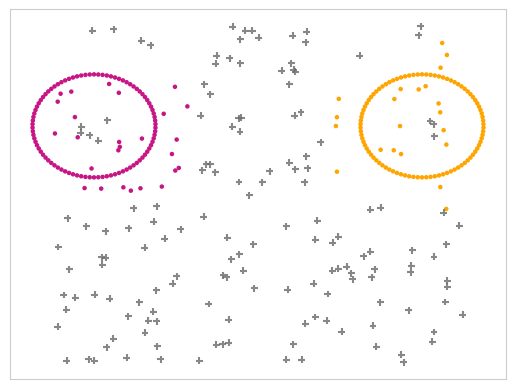

In [99]:
fig = plot_data(X, l, save_fig = 'Motivd', noise_marker_size=25, show=False, cluster_marker_density=1)

print()
print_scores(X, l)


DISCO: 0.71
DBCV: 0.47
DCSI: 1.0
LCCV: 0.52
VIASCKDE: nan
CVDD: 153.36
CDBW: 0.01
CVNN: 41.46
SILHOUETTE: 0.18
S_DBW: 0.35
DISCO_non_noise: 0.75
DISCO_noise: 0.68
DISCO_core_prop: 0.68
DISCO_dc_prop: 0.72


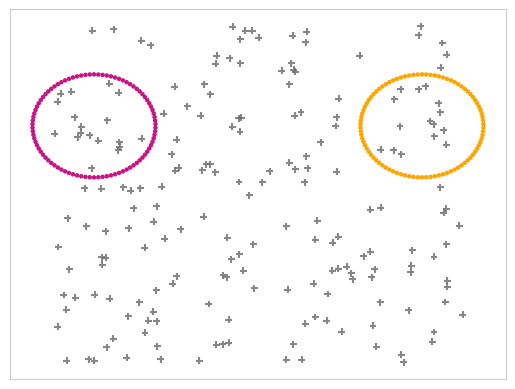

In [100]:
fig = plot_data(X, l_1,save_fig = 'Motivc', noise_marker_size=25, show=False, cluster_marker_density=1)
print()
print_scores(X, l_1)